In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
)

training_set = train_datagen.flow_from_directory(
    'data/train',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary',
)

Found 13953 images belonging to 107 classes.


In [4]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

testing_set = test_datagen.flow_from_directory(
    'data/valid',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary',
)

Found 1165 images belonging to 107 classes.


In [5]:
images, labels = next(training_set)
labels

array([ 33.,  17.,   9.,  25.,  49.,  60.,  86.,  64.,  73.,  94.,  71.,
        70.,  28.,  89.,  44.,  94.,  43.,  69.,  53.,   5.,  98.,  18.,
        30.,  92.,  46.,  59.,  81.,  78.,  26.,  90., 101.,  65.],
      dtype=float32)

In [32]:
model=Sequential()

model.add(Conv2D(16,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(64,64,3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(107,activation='softmax'))

In [33]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
batch_normalization_2 (Batch (None, 62, 62, 16)        64        
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 32)       

In [34]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
history=model.fit(training_set,epochs=20,validation_data=testing_set)

Train for 437 steps, validate for 37 steps
Epoch 1/20
437/437 [==============================] - 20s 45ms/step - loss: 4.6284 - accuracy: 0.0351 - val_loss: 4.4112 - val_accuracy: 0.0584
Epoch 2/20
437/437 [==============================] - 17s 39ms/step - loss: 3.9811 - accuracy: 0.1014 - val_loss: 3.6586 - val_accuracy: 0.1605
Epoch 3/20
437/437 [==============================] - 18s 40ms/step - loss: 3.4853 - accuracy: 0.1686 - val_loss: 3.1190 - val_accuracy: 0.2627
Epoch 4/20
437/437 [==============================] - 17s 40ms/step - loss: 3.0984 - accuracy: 0.2303 - val_loss: 2.9545 - val_accuracy: 0.3142
Epoch 5/20
437/437 [==============================] - 17s 40ms/step - loss: 2.8273 - accuracy: 0.2804 - val_loss: 2.8198 - val_accuracy: 0.3330
Epoch 6/20
437/437 [==============================] - 17s 38ms/step - loss: 2.5973 - accuracy: 0.3209 - val_loss: 2.5986 - val_accuracy: 0.3760
Epoch 7/20
437/437 [==============================] - 16s 37ms/step - loss: 2.3996 - accuracy

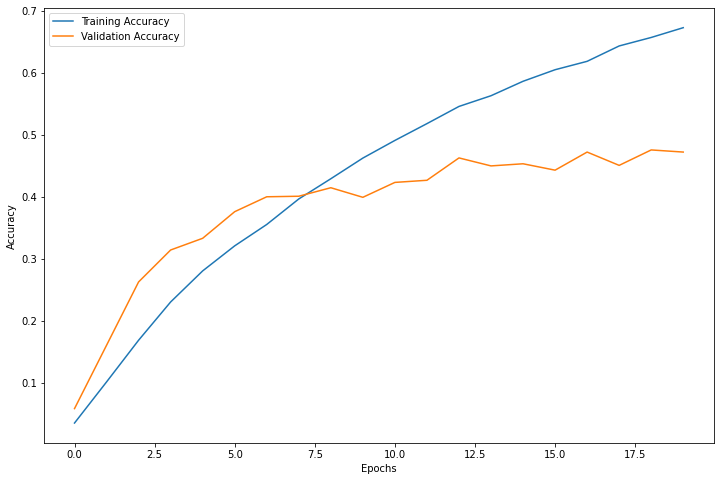

In [36]:
plt.figure(figsize=(12, 8))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


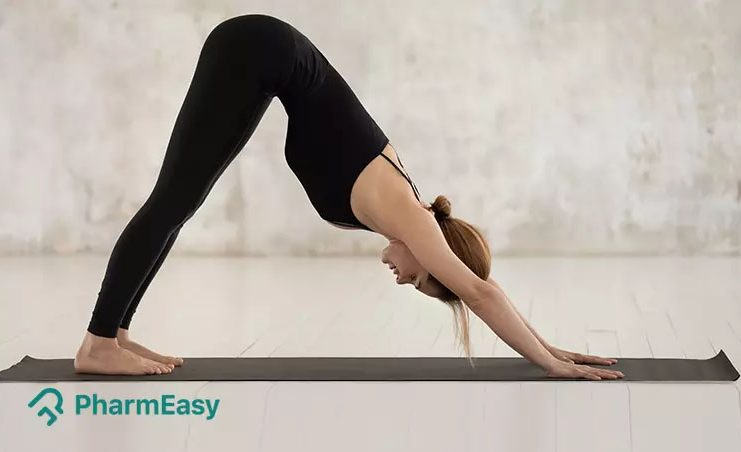

In [39]:
image = Image.open('sample/adho.jpg')

display(image)

In [40]:
test_image = image.resize((64,64))

test_image_arr = np.array(test_image)
test_inp=test_image_arr.reshape((1,64,64,3))

In [41]:
test_inp = test_inp.astype('float32')  

test_inp /= 255.0 

In [42]:
prediction=model.predict(test_inp)
prediction

array([[8.7757862e-01, 2.6652300e-09, 3.1790483e-07, 1.4733664e-08,
        3.8458139e-10, 1.6029080e-06, 1.5415720e-06, 4.1303110e-06,
        1.8759963e-05, 8.2479253e-02, 8.1407308e-07, 3.9608443e-07,
        1.2496444e-06, 2.0823206e-06, 1.8360138e-08, 3.1923311e-05,
        3.3309104e-06, 1.4235970e-05, 2.0728091e-07, 5.7834541e-07,
        7.0681567e-09, 1.8762638e-06, 3.3168143e-04, 8.5941074e-06,
        3.0142819e-06, 3.1812019e-07, 2.5948292e-09, 1.7682369e-10,
        4.4696317e-03, 9.1534233e-08, 2.1982730e-07, 2.4161091e-07,
        1.3596330e-05, 6.2218263e-08, 7.7598453e-13, 5.1081009e-13,
        3.7829129e-10, 7.9607642e-05, 1.6425684e-08, 3.6328472e-06,
        6.3666739e-05, 1.5243482e-09, 9.2342552e-06, 1.2490902e-08,
        3.7115376e-05, 3.7125513e-08, 8.2691145e-08, 2.3397002e-08,
        4.5467441e-08, 9.2513073e-05, 1.3815861e-08, 5.9711127e-08,
        8.9408814e-10, 8.3007812e-08, 2.1453423e-05, 1.1767731e-05,
        3.9666957e-11, 1.2275361e-08, 3.7850207e

In [43]:
predicted_class_index = np.argmax(prediction)
print(predicted_class_index)

0


In [49]:
model.save_weights('yoga-model.h5')